# USA Housing Price Prediction

## Problem Statement:
Find publicly available data for key factors that influence US home prices nationally. Then, build a data science model that explains how these factors impacted home prices over the last 20 years. Use the S&P Case-Schiller Home Price Index as a proxy for home prices: fred.stlouisfed.org/series/CSUSHPISA.

In [1]:
# Importing Libraries 
import numpy as np 
import pandas as pd                       
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 1: Data Collection and Preparation
Multiple key factors that influence US home prices for 20 years were collected and stored in csv files.

In [2]:
# Creating Data Frames for respective factors downloaded

# 1.MORTGAGE
mortgage=pd.read_csv('MORTGAGE.csv')   
mortgage.head()

,DATE,MORTGAGE30US
0,01/01/2002,6.9975
1,01/02/2002,6.8925
2,01/03/2002,7.0140
3,01/04/2002,6.9850
4,01/05/2002,6.8060


In [3]:
# 2.Population
pop=pd.read_csv('Population.csv')   
pop.head()

,DATE,POPTHM
0,01/01/2002,286739
1,01/02/2002,286935
2,01/03/2002,287131
3,01/04/2002,287343
4,01/05/2002,287571


In [4]:
# 3.Employment population ratio
em_pop_ratio=pd.read_csv('Employment population ratio.csv')   
em_pop_ratio.head()

,DATE,EMRATIO
0,01/01/2002,62.7
1,01/02/2002,63.0
2,01/03/2002,62.8
3,01/04/2002,62.7
4,01/05/2002,62.9


In [5]:
# 4.Demand and Supply Ratio
dem_supply=pd.read_csv('Demand and Supply Ratio.csv')   
dem_supply.head()

,DATE,MSACSR
0,01/01/2002,4.2
1,01/02/2002,4.0
2,01/03/2002,4.1
3,01/04/2002,4.3
4,01/05/2002,4.0


In [6]:
# 5.New houses sold
house_sold=pd.read_csv('New houses sold.csv')   
house_sold.head()

,DATE,NHSUSSPT
0,01/01/2002,66
1,01/02/2002,84
2,01/03/2002,90
3,01/04/2002,86
4,01/05/2002,88


In [7]:
# 6.Construction Price
cons=pd.read_csv('Construction Price.csv')    
cons.head()

,DATE,WPUSI012011
0,01/01/2002,142.0
1,01/02/2002,142.2
2,01/03/2002,143.2
3,01/04/2002,143.5
4,01/05/2002,143.8


In [8]:
# 7. Unemployement Rate
unemp_rate=pd.read_csv('Unemployment RATE.csv')
unemp_rate.head()

,DATE,UNRATE
0,01/01/2002,5.7
1,01/02/2002,5.7
2,01/03/2002,5.7
3,01/04/2002,5.9
4,01/05/2002,5.8


In [9]:
# 8.Consumer Price Index shelter
cpi_shelter=pd.read_csv('CPI shelter.csv')   
cpi_shelter.head()

,DATE,CUSR0000SAH1
0,01/01/2002,205.1
1,01/02/2002,206.0
2,01/03/2002,206.3
3,01/04/2002,207.0
4,01/05/2002,207.4


In [10]:
# 9.Consumer Price Index  rent
cpi_rent=pd.read_csv('CPI rent.csv')   
cpi_rent.head()

,DATE,CUUR0000SEHA
0,01/01/2002,197.0
1,01/02/2002,197.7
2,01/03/2002,198.2
3,01/04/2002,198.5
4,01/05/2002,198.8


In [11]:
# 10. House Prices Index(Target Variable)
price_index= pd.read_csv('Price Index.csv')  
price_index.head()

,DATE,CSUSHPISA
0,01/01/2002,117.144
1,01/02/2002,117.845
2,01/03/2002,118.687
3,01/04/2002,119.611
4,01/05/2002,120.724


Obs- 
* We can see the house price index of houses ranging from years 2002-2022(Starting from Jan 2002 and ending at Dec2022)
* Since all our factors are collected over 20 years, date column is common amongst all. and therefore first converting it into Date-Time datatype

In [12]:
# Converting Date factor into Date-Time 
df = pd.DataFrame()

#define list containing all the factors
df_list = [mortgage,pop,em_pop_ratio,dem_supply,house_sold,cons,unemp_rate,cpi_shelter,cpi_rent,price_index]
for col in df_list:
    col["DATE"] = pd.to_datetime(col["DATE"])

#### Combinining all the input factors in one common data frame

In [13]:
from functools import reduce

#merging all DataFrames into one
df_final = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'],how='left'), df_list)

In [14]:
df_final

,DATE,MORTGAGE30US,POPTHM,EMRATIO,MSACSR,NHSUSSPT,WPUSI012011,UNRATE,CUSR0000SAH1,CUUR0000SEHA,CSUSHPISA
0,2002-01-01,6.9975,286739,62.7,4.2,66,142.000,5.7,205.100,197.000,117.144
1,2002-01-02,6.8925,286935,63.0,4.0,84,142.200,5.7,206.000,197.700,117.845
2,2002-01-03,7.0140,287131,62.8,4.1,90,143.200,5.7,206.300,198.200,118.687
3,2002-01-04,6.9850,287343,62.7,4.3,86,143.500,5.9,207.000,198.500,119.611
4,2002-01-05,6.8060,287571,62.9,4.0,88,143.800,5.8,207.400,198.800,120.724
...,...,...,...,...,...,...,...,...,...,...,...
247,2022-01-08,5.2225,333799,60.1,8.7,51,342.753,3.7,356.910,373.283,301.473
248,2022-01-09,6.1120,333976,60.1,9.7,44,336.464,3.5,359.565,376.569,299.353
249,2022-01-10,6.9000,334141,60.0,9.7,43,333.796,3.7,362.160,379.436,298.873
250,2022-01-11,6.8050,334287,59.9,9.4,41,330.369,3.6,364.480,382.562,298.269


Obs- 
* We can see there are a total of 252 rows and 11 columns from which 10 are input factors that affect the output "Price Index"


* Input Factors: 
1. DATE:The Data spans for 20 years from 2002-2022
2. MORTGAGE30US:Fixed Rate Mortgage Average in the United States
3. POPTHM:Overall Population
4. EMRATIO:Employment-Population Ratio
5. MSACSR:The months' supply is the ratio of new houses for sale to new houses sold
6. NHSUSSPT:New Houses Sold by Sales Price
7. WPUSI012011: Producer Price Index of Construction Materials
8. UNRATE: unemplyment Rate
9. CUSR0000SAH1:Consumer Price Index for All Urban Consumers: Shelter 
10. CUUR0000SEHA: Consumer Price Index for All Urban Consumers: Rent 
* Output/ Label:
11. CSUSHPISA: Case-Shiller U.S. National Home Price Index 


### Step 2: EDA

In [15]:
# Checking data types of attributes
df_final.dtypes

DATE            datetime64[ns]
MORTGAGE30US           float64
POPTHM                   int64
EMRATIO                float64
MSACSR                 float64
NHSUSSPT                 int64
WPUSI012011            float64
UNRATE                 float64
CUSR0000SAH1           float64
CUUR0000SEHA           float64
CSUSHPISA              float64
dtype: object

Obs- All the columns excpet DATE are of numeric data type

In [16]:
# Checking for null values if any
df_final.isnull().sum()

DATE            0
MORTGAGE30US    0
POPTHM          0
EMRATIO         0
MSACSR          0
NHSUSSPT        0
WPUSI012011     0
UNRATE          0
CUSR0000SAH1    0
CUUR0000SEHA    0
CSUSHPISA       0
dtype: int64

Obs- There isn't any missing data in the dataset

In [17]:
# Checking for white spaces
for col in df_final.columns:
    # Count the number of white spaces in the column
    num_spaces = sum(df_final[col].astype(str).apply(lambda x: x.isspace()))

    # Display the results
    print(col,"has", num_spaces, "white spaces.") # print(f"Column '{col}' has {num_spaces} white spaces.")

DATE has 0 white spaces.
MORTGAGE30US has 0 white spaces.
POPTHM has 0 white spaces.
EMRATIO has 0 white spaces.
MSACSR has 0 white spaces.
NHSUSSPT has 0 white spaces.
WPUSI012011 has 0 white spaces.
UNRATE has 0 white spaces.
CUSR0000SAH1 has 0 white spaces.
CUUR0000SEHA has 0 white spaces.
CSUSHPISA has 0 white spaces.


In [18]:
#Check for duplicate data
df_final.duplicated().sum()

0

In [19]:
#Checking description of dataset
df_final.describe()

,MORTGAGE30US,POPTHM,EMRATIO,MSACSR,NHSUSSPT,WPUSI012011,UNRATE,CUSR0000SAH1,CUUR0000SEHA,CSUSHPISA
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,4.771565,313538.781746,60.294444,6.039683,56.761905,209.573222,6.001190,268.053417,271.185194,177.877333
std,1.156718,14563.188533,1.976689,1.955341,25.411491,45.902963,1.985615,41.154184,49.278469,42.145732
min,2.684000,286739.000000,51.300000,3.300000,20.000000,142.000000,3.500000,205.100000,197.000000,117.144000
25%,3.858000,300989.500000,58.700000,4.575000,36.000000,183.225000,4.600000,238.989500,232.858750,146.768500
50%,4.536250,314686.000000,60.050000,5.500000,50.000000,206.300000,5.550000,256.983000,259.757000,170.175500
75%,5.869625,327388.500000,62.325000,7.000000,75.250000,223.300000,7.200000,299.986750,310.576250,194.020250
max,7.014000,334420.000000,63.400000,12.200000,127.000000,353.015000,14.700000,367.355000,385.649000,304.724000


Obs-
* The mean in columns: 'MORTGAGE30US','EMRATIO','MSACSR','NHSUSSPT','WPUSI012011','UNRATE','CUSR0000SAH','CUUR0000SEHA','CSUSHPISA' is  greater than median and thus we can say Right Skewness is present in these columns.
* The mean in columns:
'POPTHM' is less than median, and thus we can say left skewness is present in the column
* The max of columns 'MSACSR','NHSUSSPT','WPUSI012011','UNRATE','CSUSHPISA' is exceptionally greter than 75% , so we can predict outliers must be present in these columns

In [20]:
# Checking the Unique Values in each column
df_final.nunique()

DATE            252
MORTGAGE30US    241
POPTHM          252
EMRATIO          57
MSACSR           71
NHSUSSPT         87
WPUSI012011     214
UNRATE           63
CUSR0000SAH1    245
CUUR0000SEHA    251
CSUSHPISA       252
dtype: int64

In [21]:
# For better visulaization, creating a copy of final dataset , and seperating DATE into day, month and year
df_final2=df_final.copy()

In [22]:
df_final2['Day']=df_final2['DATE'].apply(lambda d:d.day) #mapping day values to 'Day' column in main dataframe
df_final2['Month']=df_final2['DATE'].apply(lambda m:m.month) #mapping month values to 'Month' column in main dataframe
df_final2['Year']=df_final2['DATE'].apply(lambda y:y.year) #mapping month values to 'Year' column in main Date

In [23]:
df_final2.sample(10)

,DATE,MORTGAGE30US,POPTHM,EMRATIO,MSACSR,NHSUSSPT,WPUSI012011,UNRATE,CUSR0000SAH1,CUUR0000SEHA,CSUSHPISA,Day,Month,Year
246,2022-01-07,5.4125,333624,59.9,10.1,44,346.79,3.5,354.530,370.448,303.879,7,1,2022
49,2006-01-02,6.2525,297734,63.0,6.1,88,177.70,4.8,228.300,221.600,183.287,2,1,2006
112,2011-01-05,4.6375,311935,58.3,6.6,28,201.60,9.0,250.660,252.393,139.905,5,1,2011
129,2012-01-10,3.3825,315485,58.8,4.9,29,205.50,7.8,258.816,262.707,143.600,10,1,2012
103,2010-01-08,4.4275,310146,58.6,8.8,23,194.10,9.5,248.430,249.024,143.916,8,1,2010
47,2005-01-12,6.2720,297311,62.8,4.9,87,173.50,4.9,227.100,220.500,180.910,12,1,2005
28,2004-01-05,6.2700,292872,62.3,3.8,115,162.70,5.6,218.500,210.200,148.186,5,1,2004
179,2016-01-12,4.1980,325742,59.7,5.4,39,215.50,4.7,293.066,302.735,185.722,12,1,2016
133,2013-01-02,3.5325,316191,58.6,4.1,36,209.10,7.7,260.719,265.256,147.785,2,1,2013
155,2014-01-12,3.8640,320815,59.3,5.1,35,215.50,5.6,273.997,280.874,168.050,12,1,2014


Obs- We can see we have got data in terms of Day, Month and Year

### Visualization

#### Univariate Analysis

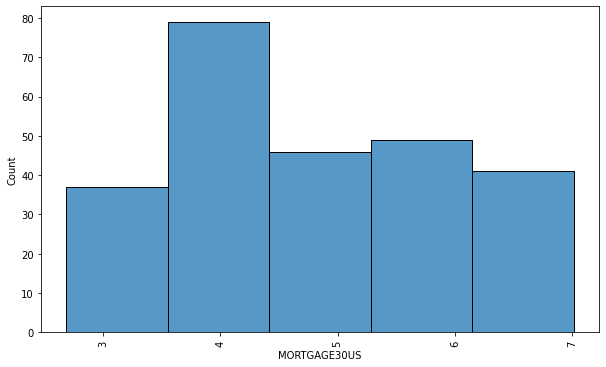

In [24]:
# Histogram to check Fixed Rate Mortgage Average
plt.figure(figsize=(10,6))
sns.histplot(df_final2['MORTGAGE30US'],bins=5)
plt.xticks(rotation=90)
plt.show()

Obs- We can see the mortgage rate for most duration has been between around 4%, and it has been attained max 7% rate 

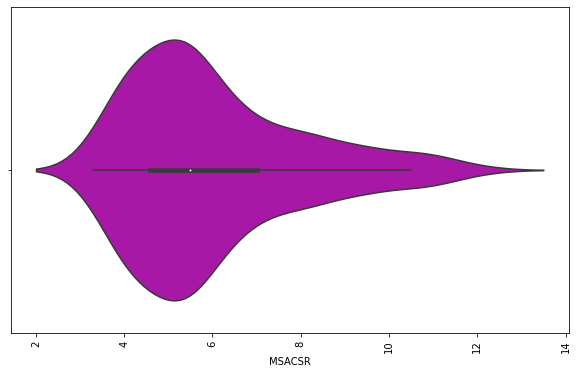

In [25]:
# Violin plot to check ratio of new houses for sale to new houses sold
plt.figure(figsize=(10,6))
sns.violinplot(x=df_final2['MSACSR'],color='m')
plt.xticks(rotation=90)
plt.show()

Obs- The ratio of new houses for sale to new houses sold falls maximum around the range of 5 and and very minimally around the range of 12-14

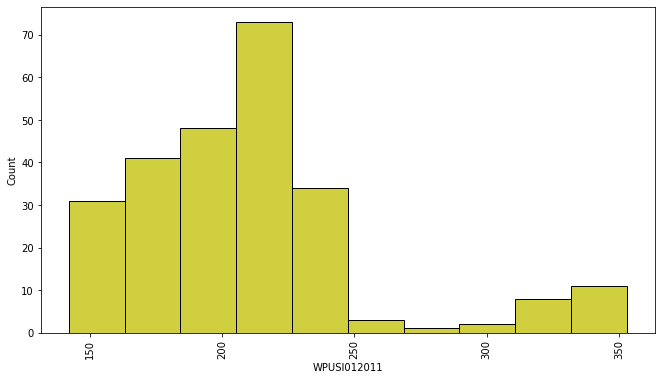

In [26]:
#  Histogram to check Producer Price Index of Construction Materials
plt.figure(figsize=(11,6))
sns.histplot(df_final2['WPUSI012011'],color='y',bins=10)
plt.xticks(rotation=90)
plt.show()

 Obs- The Producer Price Index of Construction Materials mostly falls between 200-230 and has reached maximum till 350

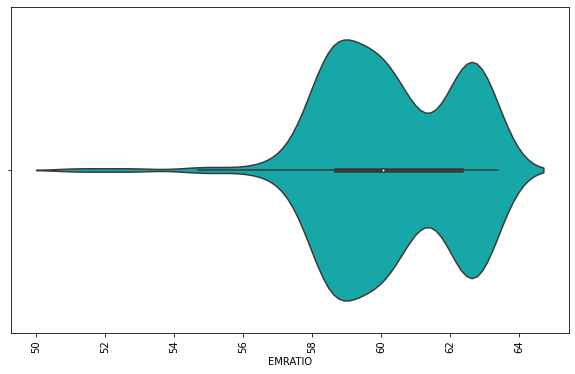

In [27]:
# Violin plot to check employment-population ratio
plt.figure(figsize=(10,6))
sns.violinplot(df_final2['EMRATIO'],color='c')
plt.xticks(rotation=90)
plt.show()

Obs- We can see the employment-population ratio of unisted states is great and rises from 59-64

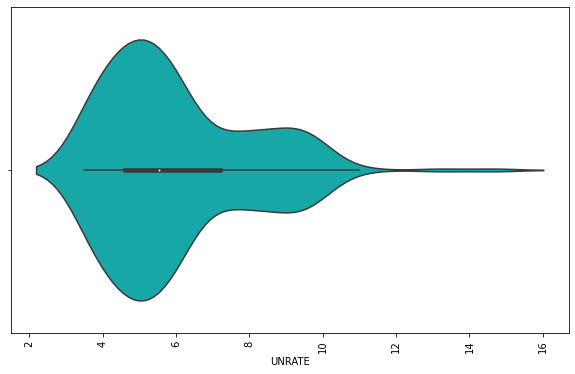

In [28]:
# Violin plot to check unemployment ratio
plt.figure(figsize=(10,6))
sns.violinplot(df_final2['UNRATE'],color='c')
plt.xticks(rotation=90)
plt.show()

Obs- We can see the opposite graph for unemployment wrt employment-population ratio. The unemployment rate of US is low and genarally falls under 4-6, with min being 2 and max being 16

In [29]:
# Distribution plot to check skewness in the features

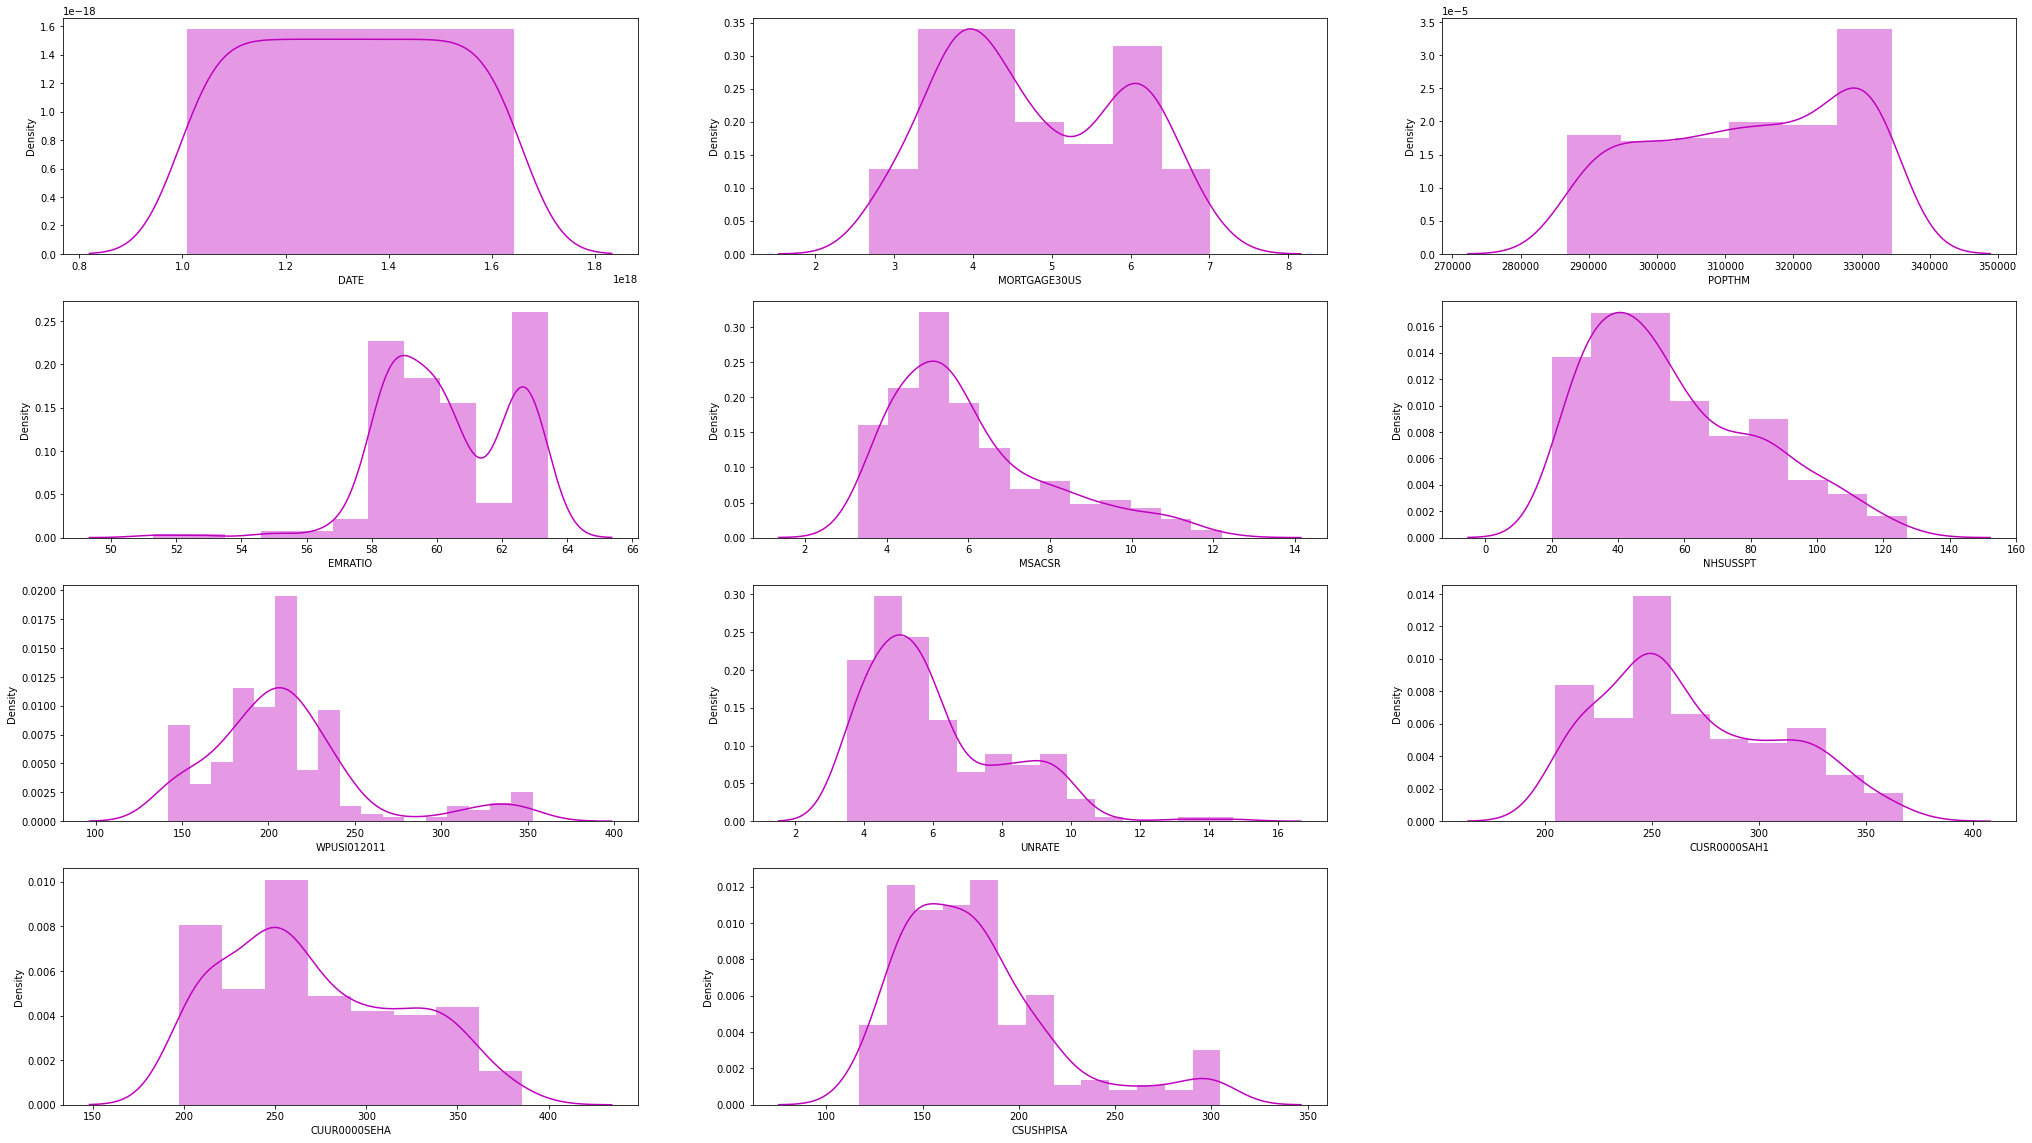

In [30]:
plt.figure(figsize=(35,20))
plotnumber=1

for column in df_final:
    if plotnumber<=12: #as there are 11  columns 
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_final[column],color='m')
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

We can see Right skewness in columns: 'MORTGAGE30US','EMRATIO','MSACSR','NHSUSSPT','WPUSI012011','UNRATE','CUSR0000SAH','CUUR0000SEHA','CSUSHPISA' and 

left skewmess in column 'POPTHM'

In [31]:
#box plot to check outliers

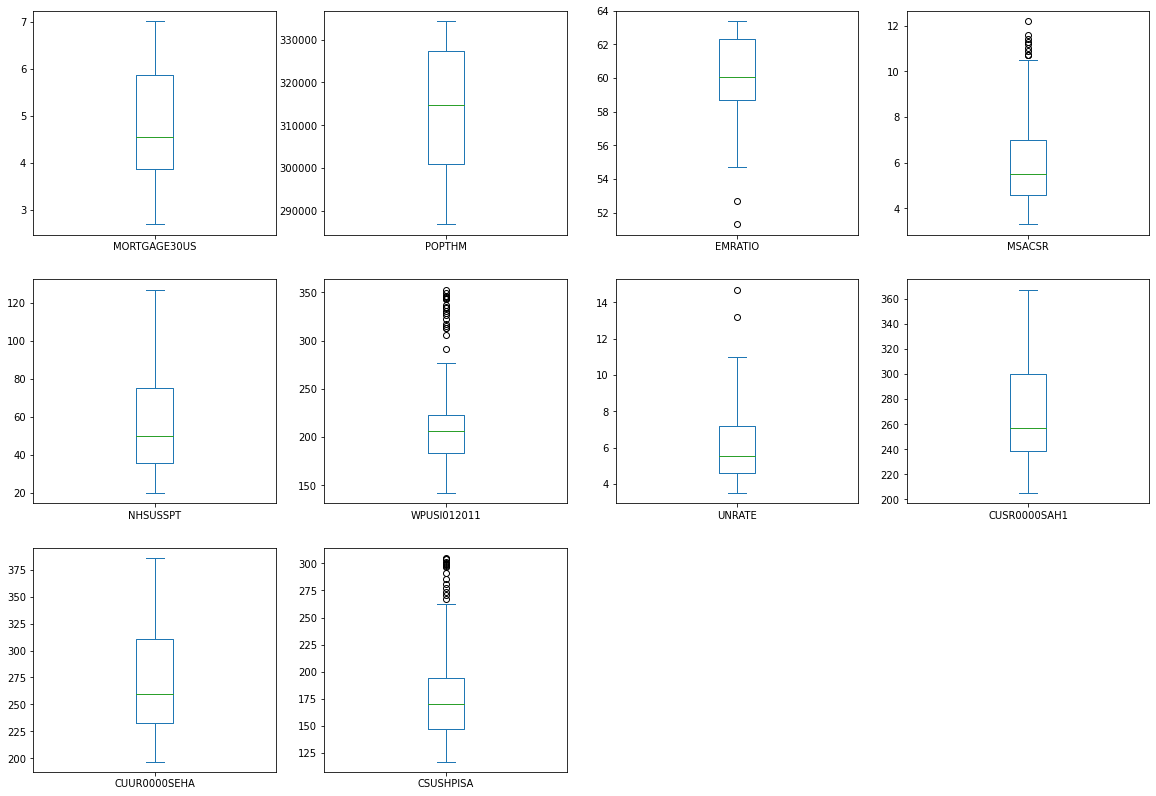

In [32]:
df_final.plot(kind='box',subplots=True,layout=(3,4),figsize=(20,14))
plt.show()

Obs- We cans see outliers are present in columns: 'EMRATIO','MSACSR','WPUSI012011','UNRATE','CSUSHPISA'

#### Bivariate Analysis

In [33]:
# Plotting all the factors over the span of 20 years, even checking what effect corono pandaemic caused on those factors

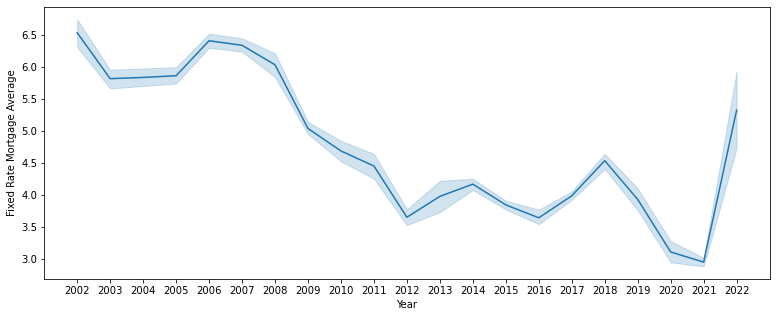

In [34]:
# Scatter Plot for checking Mortgage rate over years
plt.figure(figsize=(13,5))
sns.lineplot(df_final2.Year.astype(str),df_final2.MORTGAGE30US)
plt.xlabel('Year')
plt.ylabel('Fixed Rate Mortgage Average')
plt.show()

Obs-
* We can see mortgage rate have declined to all time lows over the past years therefore demanding for stronger demand for new homes. 
* We can see the mortgage rate has been the max,in year 2002 and over the years it has fallen and risen , however it falled majorly in year 2012.
* During the corona pandeamic period the mortgage rate falled to the least i.e around 3-3.5 and again rose back after 2021

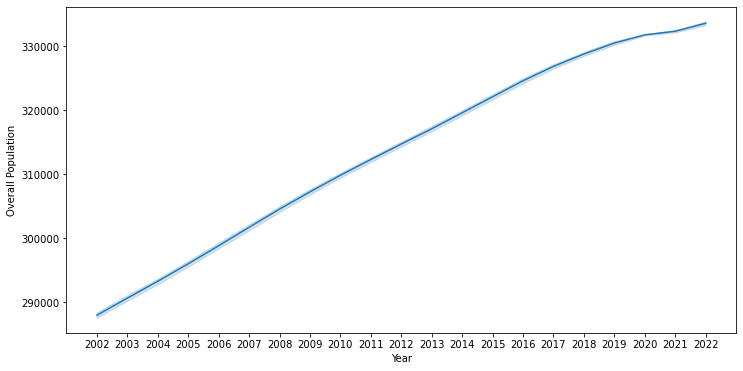

In [35]:
# Scatter plot for checking Overall Population over 20 years
plt.figure(figsize=(12,6))
sns.lineplot(df_final2.Year.astype(str),df_final2.POPTHM)
plt.xlabel('Year')
plt.ylabel('Overall Population')
plt.show()

Obs- The population has followed an increasing curve over the years

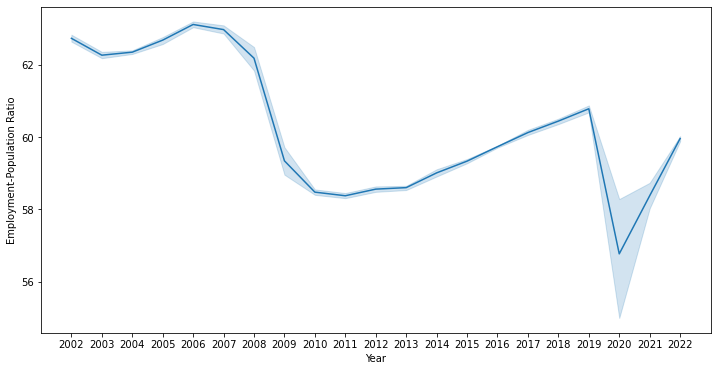

In [36]:
# Scatter plot for checking Employment-Population Ratio
plt.figure(figsize=(12,6))
sns.lineplot(df_final2.Year.astype(str),df_final2.EMRATIO)
plt.xlabel('Year')
plt.ylabel('Employment-Population Ratio')
plt.show()

Obs:
* The Employment population ratio was good till the year 2008, but it has statrted declining from year 2009, a steady increase can be observed from year 2014.
* The pandaemic period brought a decline in the employment ratio and after that again an increse is observed
    

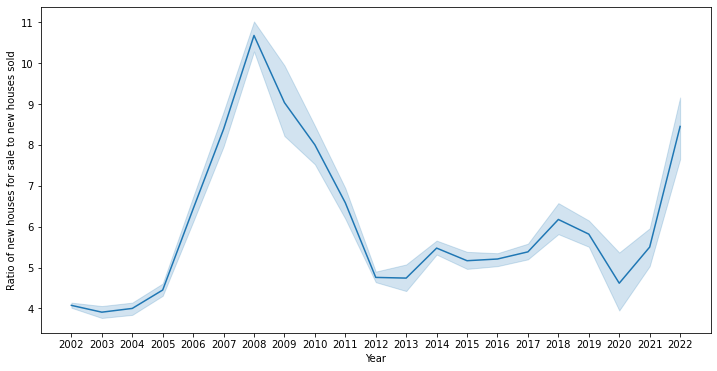

In [37]:
##  Scatter plot for checking ratio of new houses for sale to new houses sold(demand and supply)
plt.figure(figsize=(12,6))
sns.lineplot(df_final2.Year.astype(str),df_final2.MSACSR)
plt.xlabel('Year')
plt.ylabel('Ratio of new houses for sale to new houses sold')
plt.show()

Obs- The new selling of houses saw tremendous from year 2005 till 2009, again from which it started decreasing till year 2012, and since 2012, the ratio is running average

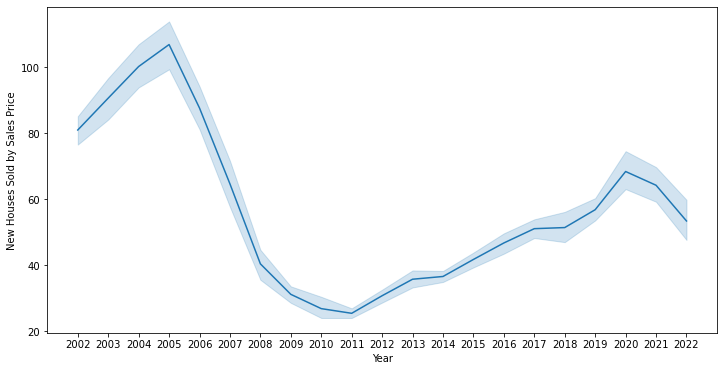

In [38]:
# Scatter plot for checking New Houses Sold by Sales Price
plt.figure(figsize=(12,6))
sns.lineplot(df_final2.Year.astype(str),df_final2.NHSUSSPT)
plt.xlabel('Year')
plt.ylabel('New Houses Sold by Sales Price')
plt.show()

Obs- We can see a good number of houses were sold till year 2006, after which a decline was observed till 2011 and after that the number of new houses sold increased just before pandaemic 

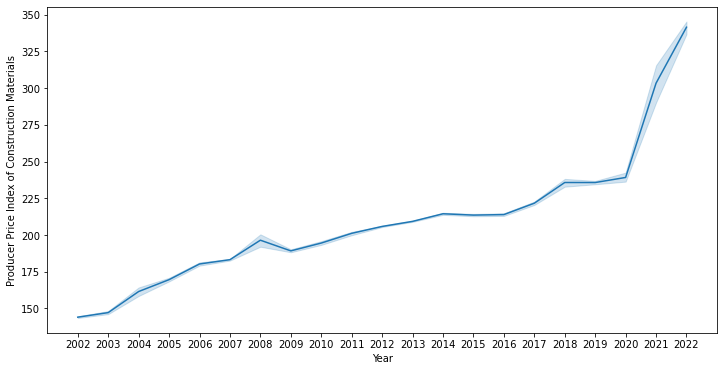

In [39]:
# Scatter plot for checking Producer Price Index of Construction Materials
plt.figure(figsize=(12,6))
sns.lineplot(df_final2.Year.astype(str),df_final2.WPUSI012011)
plt.xlabel('Year')
plt.ylabel('Producer Price Index of Construction Materials')
plt.show()

Obs- We can see the construction prices has just increased over the years

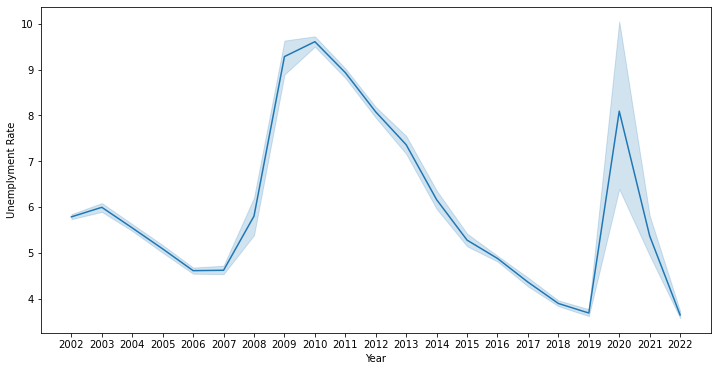

In [40]:
#  Scatter plot for checking unemplyment Rate
plt.figure(figsize=(12,6))
sns.lineplot(df_final2.Year.astype(str),df_final2.UNRATE)
plt.xlabel('Year')
plt.ylabel('Unemplyment Rate')
plt.show()

Obs- We could see the unemployment saw peek in years2011-2012, thus indicating inflation during that period. After that there was decrease in the unemployment, This unemployment however agin rose during the corona-pandaemic 

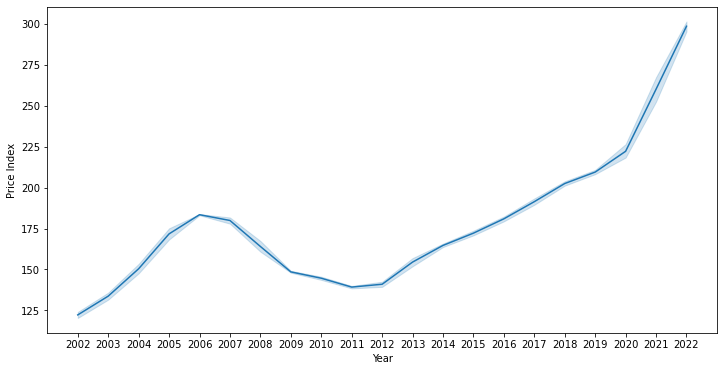

In [41]:
#  Scatter plot for checking unit price index over the span of 20 years
plt.figure(figsize=(12,6))
sns.lineplot(df_final2.Year.astype(str),df_final2.CSUSHPISA)
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.show()

Obs- We can see except for the inflation period during 2010-2012, the housing price has only elevated over the years.

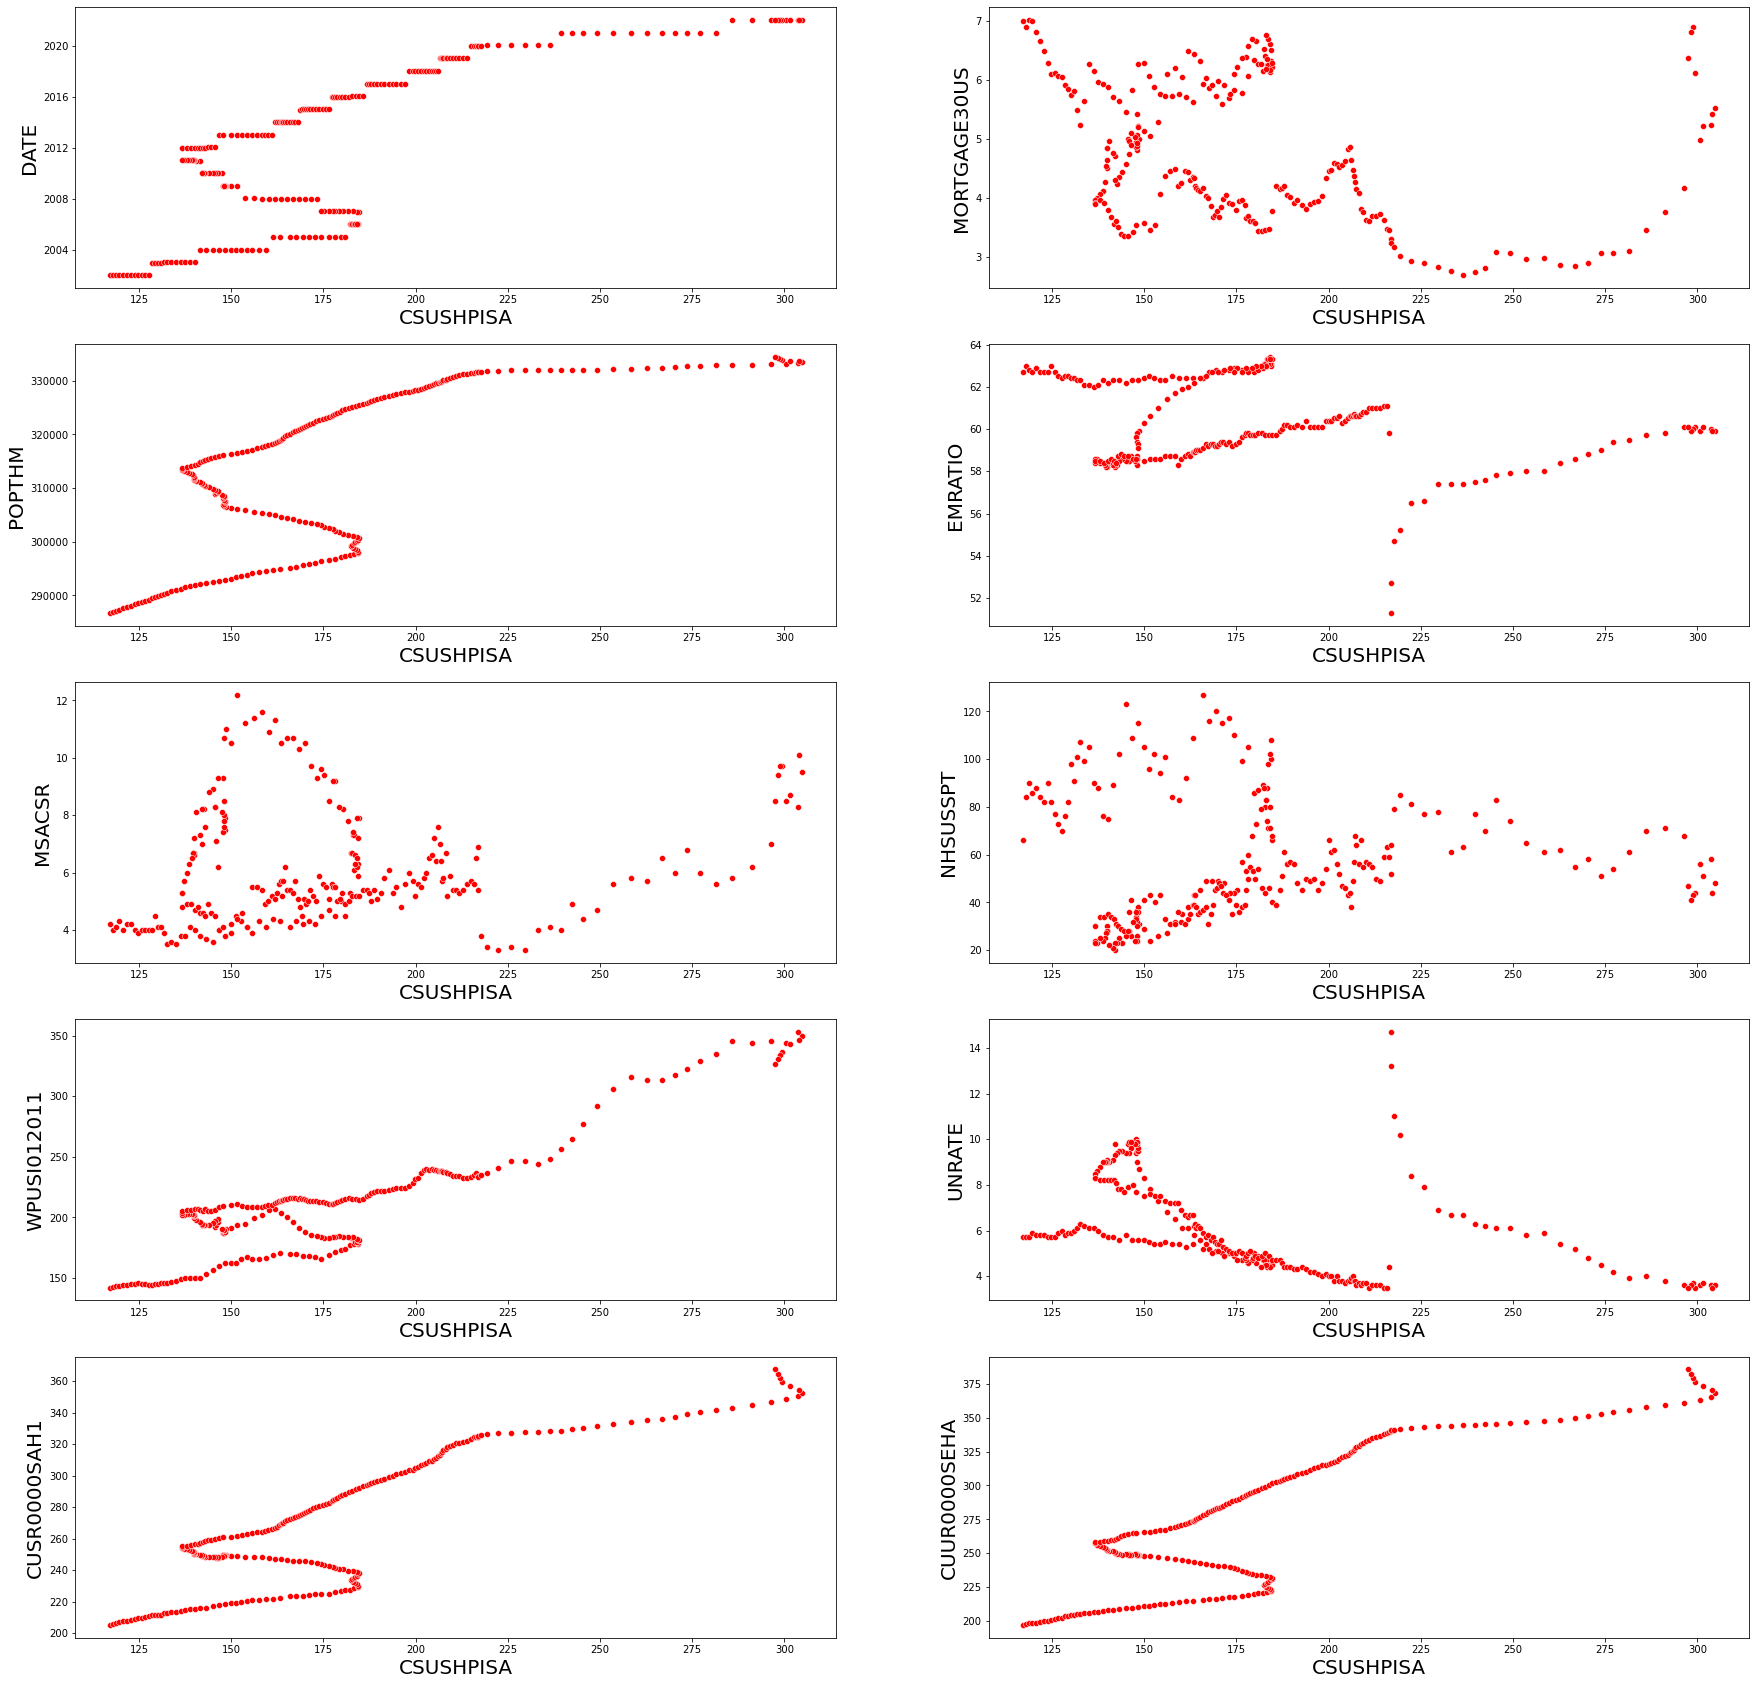

In [42]:
# Comparison of all the input factors wrt Label(Price Index)
plt.figure(figsize=(30,30))
plotnumber=1

for column in df_final:
    if plotnumber<=10: #as there are 10 i/p columns 
        ax=plt.subplot(5,2,plotnumber)
        sns.scatterplot(df_final.CSUSHPISA,df_final[column],color='r')
        plt.xlabel('CSUSHPISA',fontsize=20)
        plt.ylabel(column,fontsize=20)
    plotnumber +=1
plt.show()

Obs- We can see the price index is greatly affected by all the factors in the following ways
* DATE: Price index has grown rapidly with the increasing years 
* MORTGAGE30US: Even though the Price index have risen, Mortgage rate has been provided with declining rates.
* POPTHM:Since the overall Population has risen over the years, price index too has risen
* EMRATIO:Even though the prices are seeing its steep, same is not with the Employment-Population Ratio, it on the opposite has decreased.
* MSACSR:The demand and supply of houses was maximum when the price-index is in range 130-200, with higher prices the demand and supply is less, as only richer person can afford houses with higher price incexes.
* NHSUSSPT:Again, the major no. of new Houses sold falls in the range of 130-200
* WPUSI012011: With increase in the housing price, Construction Materials pricing has increased too.
* UNRATE: Unemplyment Rate is not directly affecting the pricing of houses 
* CUSR0000SAH1:Consumer Price Index for Shelter houses is higher for higher price index
* CUUR0000SEHA: Consumer Price Index for Rented house too is higher for higher price index

In [43]:
# Pair plot of all the attributes

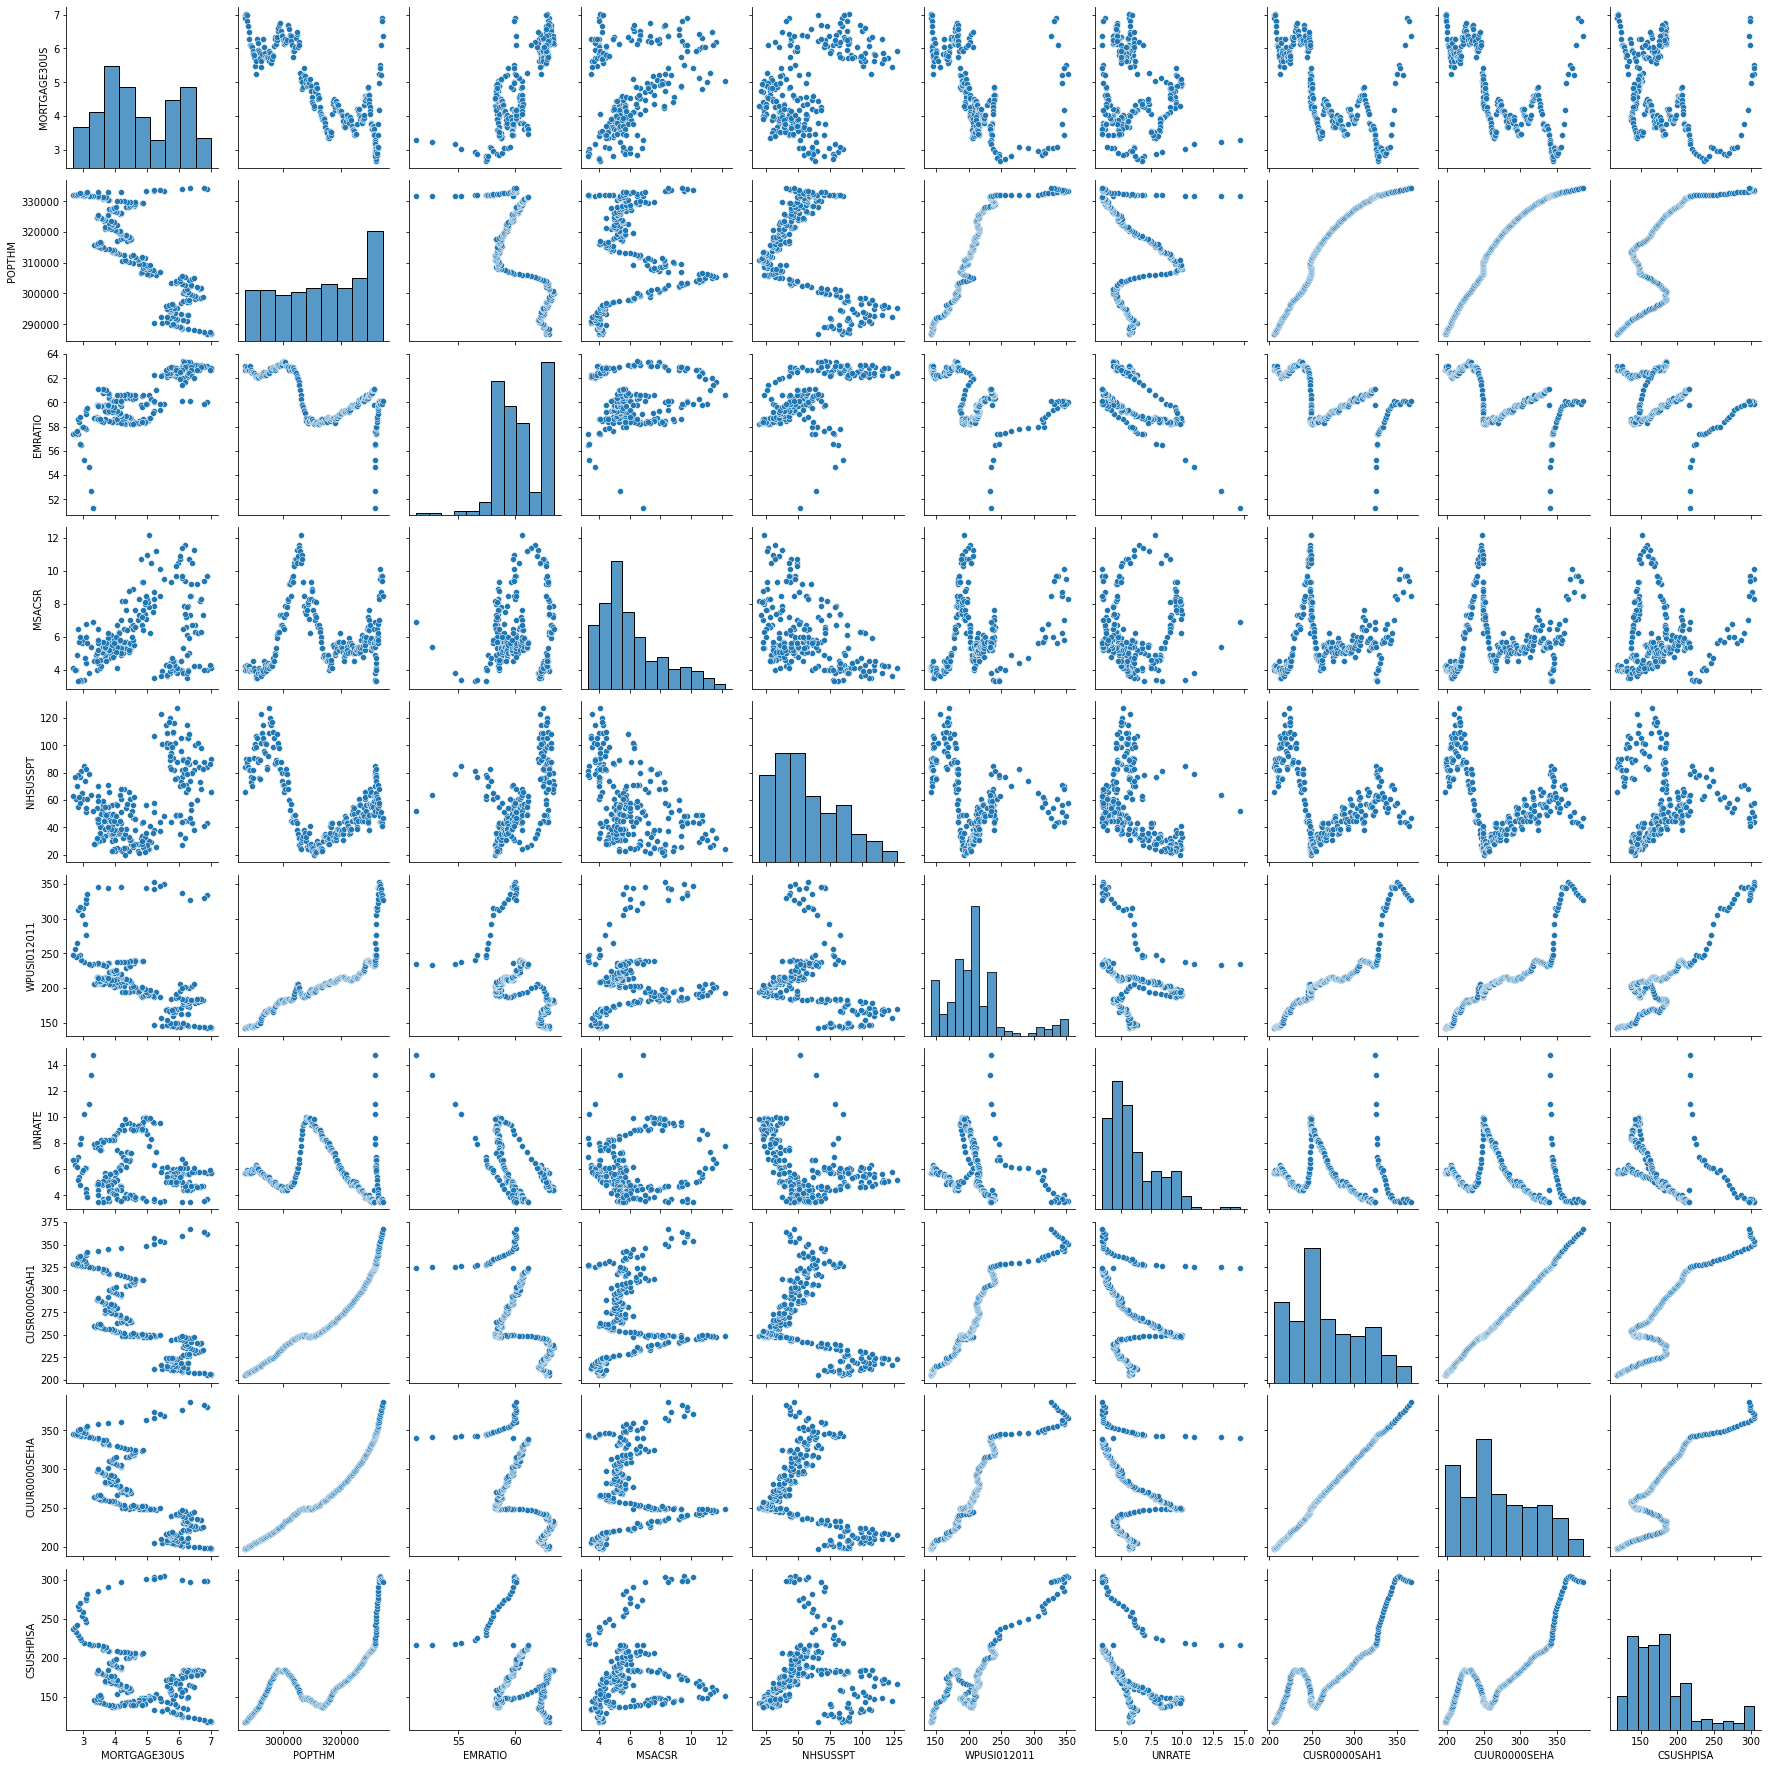

In [44]:
sns.pairplot(df_final,palette="deep")

### Checking Correlation

In [45]:
df_final.corr()

,MORTGAGE30US,POPTHM,EMRATIO,MSACSR,NHSUSSPT,WPUSI012011,UNRATE,CUSR0000SAH1,CUUR0000SEHA,CSUSHPISA
MORTGAGE30US,1.000000,-0.779684,0.786746,0.280274,0.437259,-0.519838,-0.181457,-0.648140,-0.672447,-0.297896
POPTHM,-0.779684,1.000000,-0.658048,0.071832,-0.470791,0.853002,-0.154098,0.959449,0.968234,0.711951
EMRATIO,0.786746,-0.658048,1.000000,0.056946,0.589644,-0.473606,-0.608305,-0.540537,-0.565364,-0.191252
MSACSR,0.280274,0.071832,0.056946,1.000000,-0.470330,0.224787,0.066492,0.114911,0.097397,0.177677
NHSUSSPT,0.437259,-0.470791,0.589644,-0.470330,1.000000,-0.302298,-0.389293,-0.309972,-0.329810,0.050426
WPUSI012011,-0.519838,0.853002,-0.473606,0.224787,-0.302298,1.000000,-0.247495,0.927907,0.919427,0.898973
UNRATE,-0.181457,-0.154098,-0.608305,0.066492,-0.389293,-0.247495,1.000000,-0.263897,-0.243390,-0.475602
CUSR0000SAH1,-0.648140,0.959449,-0.540537,0.114911,-0.309972,0.927907,-0.263897,1.000000,0.999098,0.861769
CUUR0000SEHA,-0.672447,0.968234,-0.565364,0.097397,-0.329810,0.919427,-0.243390,0.999098,1.000000,0.841552
CSUSHPISA,-0.297896,0.711951,-0.191252,0.177677,0.050426,0.898973,-0.475602,0.861769,0.841552,1.000000


<AxesSubplot:>

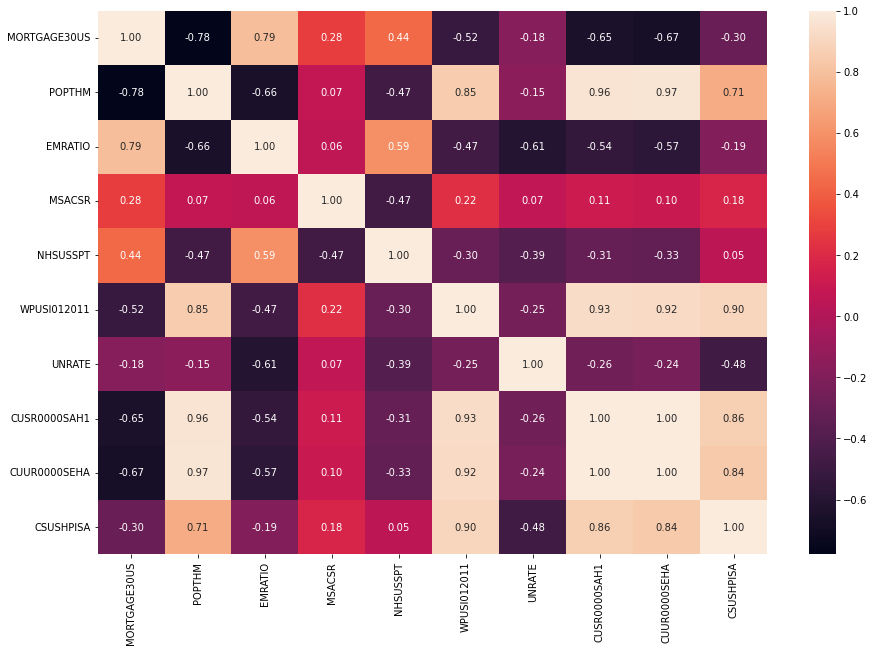

In [46]:
# Correlation using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_final.corr(),annot=True,fmt='0.2f')

Obs- We can see:
* Highly positive correlated columns(>=0.8):('MORTGAGE30US and  EMRATIO'),('POPTHM  and WPUSI012011 and CUSR0000SAH1 and CUUR0000SEHA'),('WPUSI012011 and CUSR0000SAH1 and CUUR0000SEHA and CSUSHPISA'),('CUUR0000SEHA and CUSR0000SAH1 and CSUSHPISA'),('CUUR0000SEHA and CSUSHPISA'),('CUSR0000SAH1 and CSUSHPISA')
* Positive correlated columns(>=0.4):('MORTGAGE30US and NHSUSSPT'),('POPTHM and CSUSHPISA'),('EMRATIO and NHSUSSPT')
* Highly negative correlated columns(>=-0.6):('MORTGAGE30US and POPTHM and CUSR0000SAH1 and CUUR0000SEHA'),('POPTHM and EMRATIO'),('EMRATIO and UNRATE')
* Negative correlated columns(>-0.2):('MORTGAGE30US and CSUSHPISA'),('POPTHM and NHSUSSPT'),('EMRATIO and CUSR0000SAH1 and CUUR0000SEHA'),('MSACSR and NHSUSSPT'),('NHSUSSPT and WPUSI012011 and UNRATE and CUSR0000SAH1 and CUUR0000SEHA'),('WPUSI012011 and UNRATE'),('UNRATE and CUSR0000SAH1 and CUUR0000SEHA and CSUSHPISA')

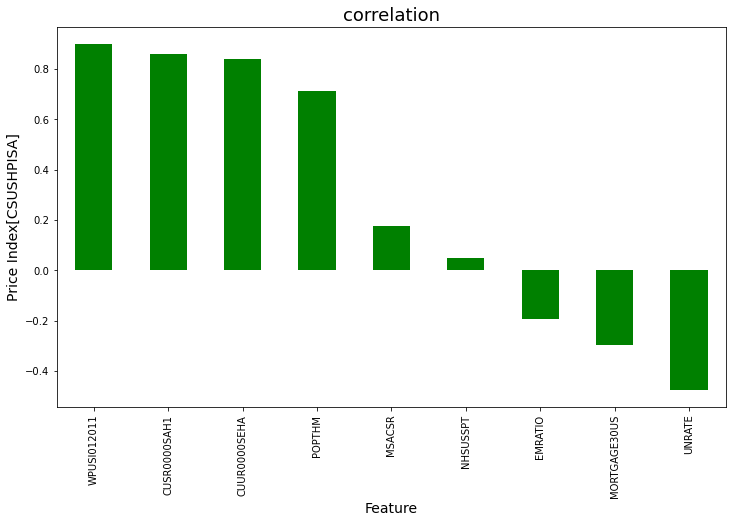

In [47]:
# Correlation of features with Target Column a)Votes
plt.figure(figsize=(12,7))
df_final.corr()['CSUSHPISA'].sort_values(ascending=False).drop(['CSUSHPISA']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Price Index[CSUSHPISA]',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Obs- 
* Positive correlated columns witn target are: WPUSI012011, CUSR0000SAH1, CUUR0000SEHA,POPTHM
* Negative correlated columns with target are: EMRATIO, MORTGAGE30US , UNRATE

In [48]:
# Deleting DATE column because it is not of numerical type, and even if we convert it into numerical type, it will take continuous value from 1 -252
df_final.drop(columns='DATE',inplace=True)

In [49]:
df_final.shape

(252, 10)

Obs- We can see the date column has been deleted

### Detecting Outliers and Treating them

In [50]:
# Using Z-Score method
from scipy.stats import zscore
z=np.abs(zscore(df_final))
threshold=3

In [51]:
df_final_clean=df_final[(z<3).all(axis=1)]

In [52]:
print("df_final_clean.shape:",df_final_clean.shape)

df_final_clean.shape: (247, 10)


Obs- We can see earlier there were 252 rows and after eliminating the outliers 247 rows are remaining

In [53]:
# Percentage Loss
per_loss=(252-247)/252*100
per_loss

1.984126984126984

In [54]:
# making the changes in our original dataframe
dropindx = df_final.index.difference(df_final_clean.index)

In [55]:
df_final.drop(dropindx,inplace = True)

In [56]:
df_final.reset_index(drop=True,inplace = True)

In [57]:
df_final.shape

(247, 10)

## Step 3: Model Building

### Data Preprocessing

### Seperating Input and Target variables

In [58]:
x=df_final.drop(columns='CSUSHPISA') # dropping label column: price index from complete dataframe 
y=df_final['CSUSHPISA']

In [59]:
x.shape

(247, 9)

In [60]:
y.shape

(247,)

### Data Transformation to treat Skewness

In [61]:
x.skew()

MORTGAGE30US    0.180029
POPTHM         -0.215506
EMRATIO         0.020780
MSACSR          1.055195
NHSUSSPT        0.699675
WPUSI012011     1.275158
UNRATE          0.791117
CUSR0000SAH1    0.494713
CUUR0000SEHA    0.420144
dtype: float64

Obs- Keeping the acceptable range as +/-0.5, we can see skewness is present in columns: 'MSACSR','NHSUSSPT','WPUSI012011','UNRATE'

#### Applying Transformation Method

In [62]:
x=pd.DataFrame(x)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() 
skew_col = ['MSACSR','NHSUSSPT','WPUSI012011','UNRATE'] 
x[skew_col]= pt.fit_transform(x[skew_col].values)

In [63]:
# Rechecking the skewness
x.skew()

MORTGAGE30US    0.180029
POPTHM         -0.215506
EMRATIO         0.020780
MSACSR          0.069196
NHSUSSPT        0.005527
WPUSI012011    -0.010738
UNRATE          0.068412
CUSR0000SAH1    0.494713
CUUR0000SEHA    0.420144
dtype: float64

Obs- We can see skewness is removed from columns-'Years' and 'Gross_Collection'

### Data Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale=pd.DataFrame(x_scale,columns=x.columns)

In [65]:
x=pd.DataFrame(data=x_scale)

### Checking Multi-Collinearity

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_cal():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

vif_cal()

    VIF Factor      Features
0     9.111577  MORTGAGE30US
1   149.843868        POPTHM
2    53.625584       EMRATIO
3     8.555341        MSACSR
4     9.175144      NHSUSSPT
5    32.792220   WPUSI012011
6    32.230939        UNRATE
7  7791.987840  CUSR0000SAH1
8  8455.178673  CUUR0000SEHA


* Keeping the acceptable range as below or equal 10, we observe the VIF of 'POPTHM', 'EMRATIO', 'WPUSI012011','UNRATE','CUUR0000SEHA','CUUR0000SEHA' is high


* Deleting the columns 'CUUR0000SEHA' as it has very high VIF and also they have strong correlation with CUUR0000SEHA

In [67]:
x.drop('CUUR0000SEHA', axis =1, inplace=True) # Dropping 'Temp9am' column

In [68]:
x.shape

(247, 8)

Obs- We can see CUUR0000SEHA column has been removed

In [69]:
# Rechecking the VIF
vif_cal()

   VIF Factor      Features
0    8.972442  MORTGAGE30US
1   92.290987        POPTHM
2   52.604862       EMRATIO
3    6.136288        MSACSR
4    6.482333      NHSUSSPT
5   16.959509   WPUSI012011
6   32.225428        UNRATE
7   40.138911  CUSR0000SAH1


Obs- We can see even now VIF of few columns is high, but we will keep them as features are important as they have good correlation with the target

### Data Modelling

In [70]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
# Finding Best Random State
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    knr = KNeighborsRegressor()
    knr.fit(x_train, y_train)
    pred1 = knr.predict(x_test)
    acc=r2_score(y_test, pred1)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9975081077727257  on Random_state  195


#### Splitting data into Train-Test

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=195)

In [73]:
x_train.shape

(197, 8)

In [74]:
y_train.shape

(197,)

In [75]:
x_test.shape

(50, 8)

In [76]:
y_test.shape

(50,)

### Using various Machine Learning Algorithms

#### 1. Linear Regression

In [77]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9753620302370726

In [78]:
predlr=lr.predict(x_test)
print("The performance metrix of Linear Regression is as below \n")
print("r2_score=",r2_score(y_test,predlr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predlr))
print("Mean Squared Error:",mean_squared_error(y_test,predlr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predlr)))

The performance metrix of Linear Regression is as below 

r2_score= 0.980750270277605 

Mean Absolute Error: 4.591706875930412
Mean Squared Error: 33.16616822717188
Root Meand Squared Error: 5.759007573112913


#### 2. Support Vector Regressor

In [79]:
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

0.4594139867665772

In [80]:
predsvr=svr.predict(x_test)
print("The performance metrix of Support Vector Regressor is as below \n")
print("r2_score=",r2_score(y_test,predsvr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predsvr))
print("Mean Squared Error:",mean_squared_error(y_test,predsvr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predsvr)))

The performance metrix of Support Vector Regressor is as below 

r2_score= 0.2579088507245805 

Mean Absolute Error: 18.857828650371836
Mean Squared Error: 1278.580024327826
Root Meand Squared Error: 35.757237369906335


In [81]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [82]:
preddtr=dtr.predict(x_test)
print("The performance metrix of Decision Tree Regressor is as below \n")
print("r2_score=",r2_score(y_test,preddtr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,preddtr))
print("Mean Squared Error:",mean_squared_error(y_test,preddtr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,preddtr)))

The performance metrix of Decision Tree Regressor is as below 

r2_score= 0.9970313199757498 

Mean Absolute Error: 1.7219600000000015
Mean Squared Error: 5.1148635599999945
Root Meand Squared Error: 2.261606411381077


#### 4. K Neighbors Regressor

In [83]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr.score(x_train,y_train)

0.9945319439957224

In [84]:
predknr=knr.predict(x_test)
print("The performance metrix of K Neighbors Regressor is as below \n")
print("r2_score=",r2_score(y_test,predknr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predknr))
print("Mean Squared Error:",mean_squared_error(y_test,predknr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predknr)))

The performance metrix of K Neighbors Regressor is as below 

r2_score= 0.9975081077727257 

Mean Absolute Error: 1.6336279999999965
Mean Squared Error: 4.293385829600012
Root Meand Squared Error: 2.072048703481656


#### 5.Random Forest Regressor

In [85]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9996563937918229

In [86]:
predrfr=rfr.predict(x_test)
print("The performance metrix of Random Forest Regressor is as below \n")
print("r2_score=",r2_score(y_test,predrfr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y_test,predrfr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predrfr)))

The performance metrix of Random Forest Regressor is as below 

r2_score= 0.9986690586600495 

Mean Absolute Error: 1.084125200000043
Mean Squared Error: 2.293134761780117
Root Meand Squared Error: 1.5143099952718126


#### 6.Ada Boost Regressor

In [87]:
adr=AdaBoostRegressor()
adr.fit(x_train,y_train)
adr.score(x_train,y_train)

0.984685992703956

In [88]:
predadr=adr.predict(x_test)
print("The performance metrix of Ada Boost Regressor is as below \n")
print("r2_score=",r2_score(y_test,predadr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predadr))
print("Mean Squared Error:",mean_squared_error(y_test,predadr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predadr)))

The performance metrix of Ada Boost Regressor is as below 

r2_score= 0.9909641257845889 

Mean Absolute Error: 3.1598940871895063
Mean Squared Error: 15.568287380120216
Root Meand Squared Error: 3.945666911958005


#### 7.Gradient Boosting Regressor

In [89]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

0.9997859222404721

In [90]:
predgbr=gbr.predict(x_test)
print("The performance metrix of Gradient Boosting Regressor is as below \n")
print("r2_score=",r2_score(y_test,predgbr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predgbr))
print("Mean Squared Error:",mean_squared_error(y_test,predgbr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predgbr)))

The performance metrix of Gradient Boosting Regressor is as below 

r2_score= 0.9985750919073273 

Mean Absolute Error: 1.179360984281483
Mean Squared Error: 2.4550340286004646
Root Meand Squared Error: 1.5668548205243729


#### Regularization to overcome Over-Fitting (Lasso,Ridge)

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

#### 8. Lasso Regression

In [92]:
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9725016579308255

In [93]:
predls=ls.predict(x_test)
print("The performance metrix of Lasso Regressor is as below \n")
print("r2_score=",r2_score(y_test,predls),"\n")
print("Mean Absolute Error:",mean_absolute_error(y_test,predls))
print("Mean Squared Error:",mean_squared_error(y_test,predls))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predls)))

The performance metrix of Lasso Regressor is as below 

r2_score= 0.9793434080027481 

Mean Absolute Error: 4.878838640965977
Mean Squared Error: 35.59011035795827
Root Meand Squared Error: 5.965744744619759


#### 9. Ridge Regression

In [94]:
rg=Ridge(alpha=0.1)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.9752780929742064

In [95]:
predrg=rg.predict(x_test)
print("The performance metrix of Ridge Regressor is as below \n")
print("r2_score=",r2_score(y_test,predrg),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predrg))
print("Mean Squared Error:",mean_squared_error(y_test,predrg))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predrg)))

The performance metrix of Ridge Regressor is as below 

r2_score= 0.9810085983249548 

Mean Absolute Error: 4.610099149537237
Mean Squared Error: 32.72108397924951
Root Meand Squared Error: 5.720234608759461


### Cross Validation

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
from sklearn.model_selection import cross_val_score

# cv score for Linear Regression 
cvlr=cross_val_score(lr,x,y,cv=5).mean()
print('CV score  for Linear rgerssion:',cvlr)
print("And Difference between CV and r2_score =", r2_score(y_test,predlr)-cvlr)

CV score  for Linear rgerssion: 0.2590081807982762
And Difference between CV and r2_score = 0.7217420894793287


In [99]:
# cv score for Support Vector Regressor
cvsvr=cross_val_score(svr,x,y,cv=5).mean()
print('CV score  for Support Vector Regressor:',cvsvr)
print("And Difference between CV and r2_score =", r2_score(y_test,predsvr)-cvsvr)

CV score  for Support Vector Regressor: -1.581731222247009
And Difference between CV and r2_score = 1.8396400729715894


In [100]:
# cv score for Decision Tree Regressor
cvdtr=cross_val_score(dtr,x,y,cv=5).mean()
print('CV score  for Decision Tree Regressor:',cvdtr)
print("And Difference between CV and r2_score =", r2_score(y_test,preddtr)-cvdtr)

CV score  for Decision Tree Regressor: -1.1955001158786343
And Difference between CV and r2_score = 2.192531435854384


In [101]:
# cv score for K Neighbors Regressor
cvknr=cross_val_score(knr,x,y,cv=5).mean()
print('CV score  for K Neighbors Regressor:',cvknr)
print("And Difference between CV and r2_score =", r2_score(y_test,predknr)-cvknr)

CV score  for K Neighbors Regressor: -1.329007310637064
And Difference between CV and r2_score = 2.3265154184097896


In [102]:
# cv score for Random Forest Regressor
cvrfr=cross_val_score(rfr,x,y,cv=5).mean()
print('CV score  for Random Forest Regressor:',cvrfr)
print("And Difference between CV and r2_score =", r2_score(y_test,predrfr)-cvrfr)

CV score  for Random Forest Regressor: -0.7812886583935985
And Difference between CV and r2_score = 1.779957717053648


In [103]:
# cv score for Ada Boost Regressor
cvadr=cross_val_score(adr,x,y,cv=5).mean()
print('CV score  for Ada Boost Regressor:',cvadr)
print("And Difference between CV and r2_score =", r2_score(y_test,predadr)-cvadr)

CV score  for Ada Boost Regressor: -0.9809702298337928
And Difference between CV and r2_score = 1.9719343556183817


In [104]:
# cv score for Gradient Boosting Regressor
cvgbr=cross_val_score(gbr,x,y,cv=5).mean()
print('CV score  for Gradient Boosting Regressor:',cvgbr)
print("And Difference between CV and r2_score =", r2_score(y_test,predgbr)-cvgbr)

CV score  for Gradient Boosting Regressor: -0.481544304249895
And Difference between CV and r2_score = 1.4801193961572223


In [105]:
# cv score for Lasso Regressor
cvls=cross_val_score(ls,x,y,cv=5).mean()
print('CV score  for Lasso Regressor:',cvls)
print("And Difference between CV and r2_score =", r2_score(y_test,predls)-cvls)

CV score  for Lasso Regressor: 0.3908766994703946
And Difference between CV and r2_score = 0.5884667085323535


In [106]:
# cv score for Ridge Regressor
cvrg=cross_val_score(rg,x,y,cv=5).mean()
print('CV score  for Ridge Regressor:',cvrg)
print("And Difference between CV and r2_score =", r2_score(y_test,predrg)-cvrg)

CV score  for Ridge Regressor: 0.3246592724978319
And Difference between CV and r2_score = 0.6563493258271229


##### Obs- 
* ###### Unfortunately, all the models are giving very low cv_score, thus we can say all the machine learning algorithms are overfitting the data
 
* ###### The difference between r2_score and cv score is least in Lasso Regressor so selecting it as the best model

### Hyper Parameter Tuning

In [108]:
ls.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [109]:
#Selecting few parameter list to pass in Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV
# defining parameter range
parameter = {'alpha':[0,0.01,0.1,1], 
             'max_iter':[10,100,1000],
             'random_state': [24,32,44,74,112]}

In [110]:
# Start Tuning 
ls1=Lasso()
GCV = GridSearchCV(ls1,parameter,cv=5)

GCV.fit(x_train,y_train)  
print(GCV.best_params_) 

{'alpha': 0, 'max_iter': 1000, 'random_state': 24}


In [113]:
#Applying best parameter values on Gradient Boossting Regressor Algorithm 
price_best=Lasso(alpha=0, max_iter=1000, random_state= 24)
price_best.fit(x_train,y_train)
price_best.score(x_train,y_train)

0.9753620302370726

Obs- By applying the best parameters , we can see a slight increment in our r2_score

## Step 4: Saving the best Regressor model 

In [114]:
import joblib

joblib.dump(price_best,'price_best.obj')

['price_best.obj']

In [115]:
price_best_model=joblib.load('price_best.obj')

In [116]:
# Viewing the attributes of best model
price_best_model

Lasso(alpha=0, random_state=24)

## Step 5: Prediction

In [118]:
ori = np.array(y_test)
predicted = np.array(price_best_model.predict(x_test))
df_new = pd.DataFrame({"Original":ori,"Predicted":predicted},index= range(len(ori)))
df_new.sample(10)

,Original,Predicted
12,169.800,174.148073
16,209.287,216.597577
24,270.377,269.206815
49,143.192,143.362950
44,183.287,171.956174
34,202.913,210.485272
47,168.634,165.287781
33,222.391,214.868816
45,161.288,161.242791
27,211.791,214.105917


Obs- We can see our best model is giving very good results

Text(0.5, 1.0, 'Original vs predicted  graph')

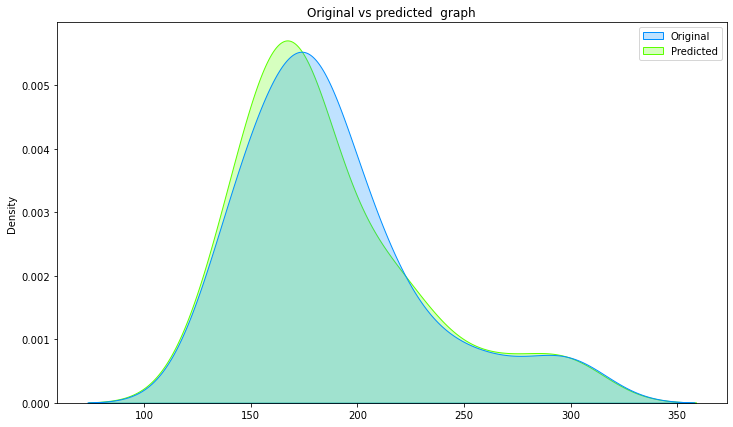

In [119]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

Obs-We can see the the predicted graph follows original graph majorly

## Concluding Remarks

* Starting by analyzing various input factors that affect the price index of US homes, we collected 10 different factors.

* Analysis of all these factors impacting the price index was done visually as well as with the help of correlation.

* We found the output of "Price Incex" using regression model

* The r2_score of these models were then checked, and also cross-validation was performed to avoid overfitting of models. Eventhough the models didnot gave good r2_score or cv-score, but after applying hyper parameter tuning, model without PCA gave considerably better results and hence selected it as the best model.

* The best model, i.e  price_best= Lasso gave r2_score= 0.9753620302370726

   ### Thank You